In [ ]:
%pip install scikit-learn
%pip install tensorflow
%pip install matplotlib
%pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.1 MB 100 kB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 455 kB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load iris dataset (4 features: sepal length, sepal width, petal length, petal width)
iris = load_iris()
X = iris.data  # shape (150, 4)
y = iris.target

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)  

Explained variance ratio: [0.92461872 0.05306648]


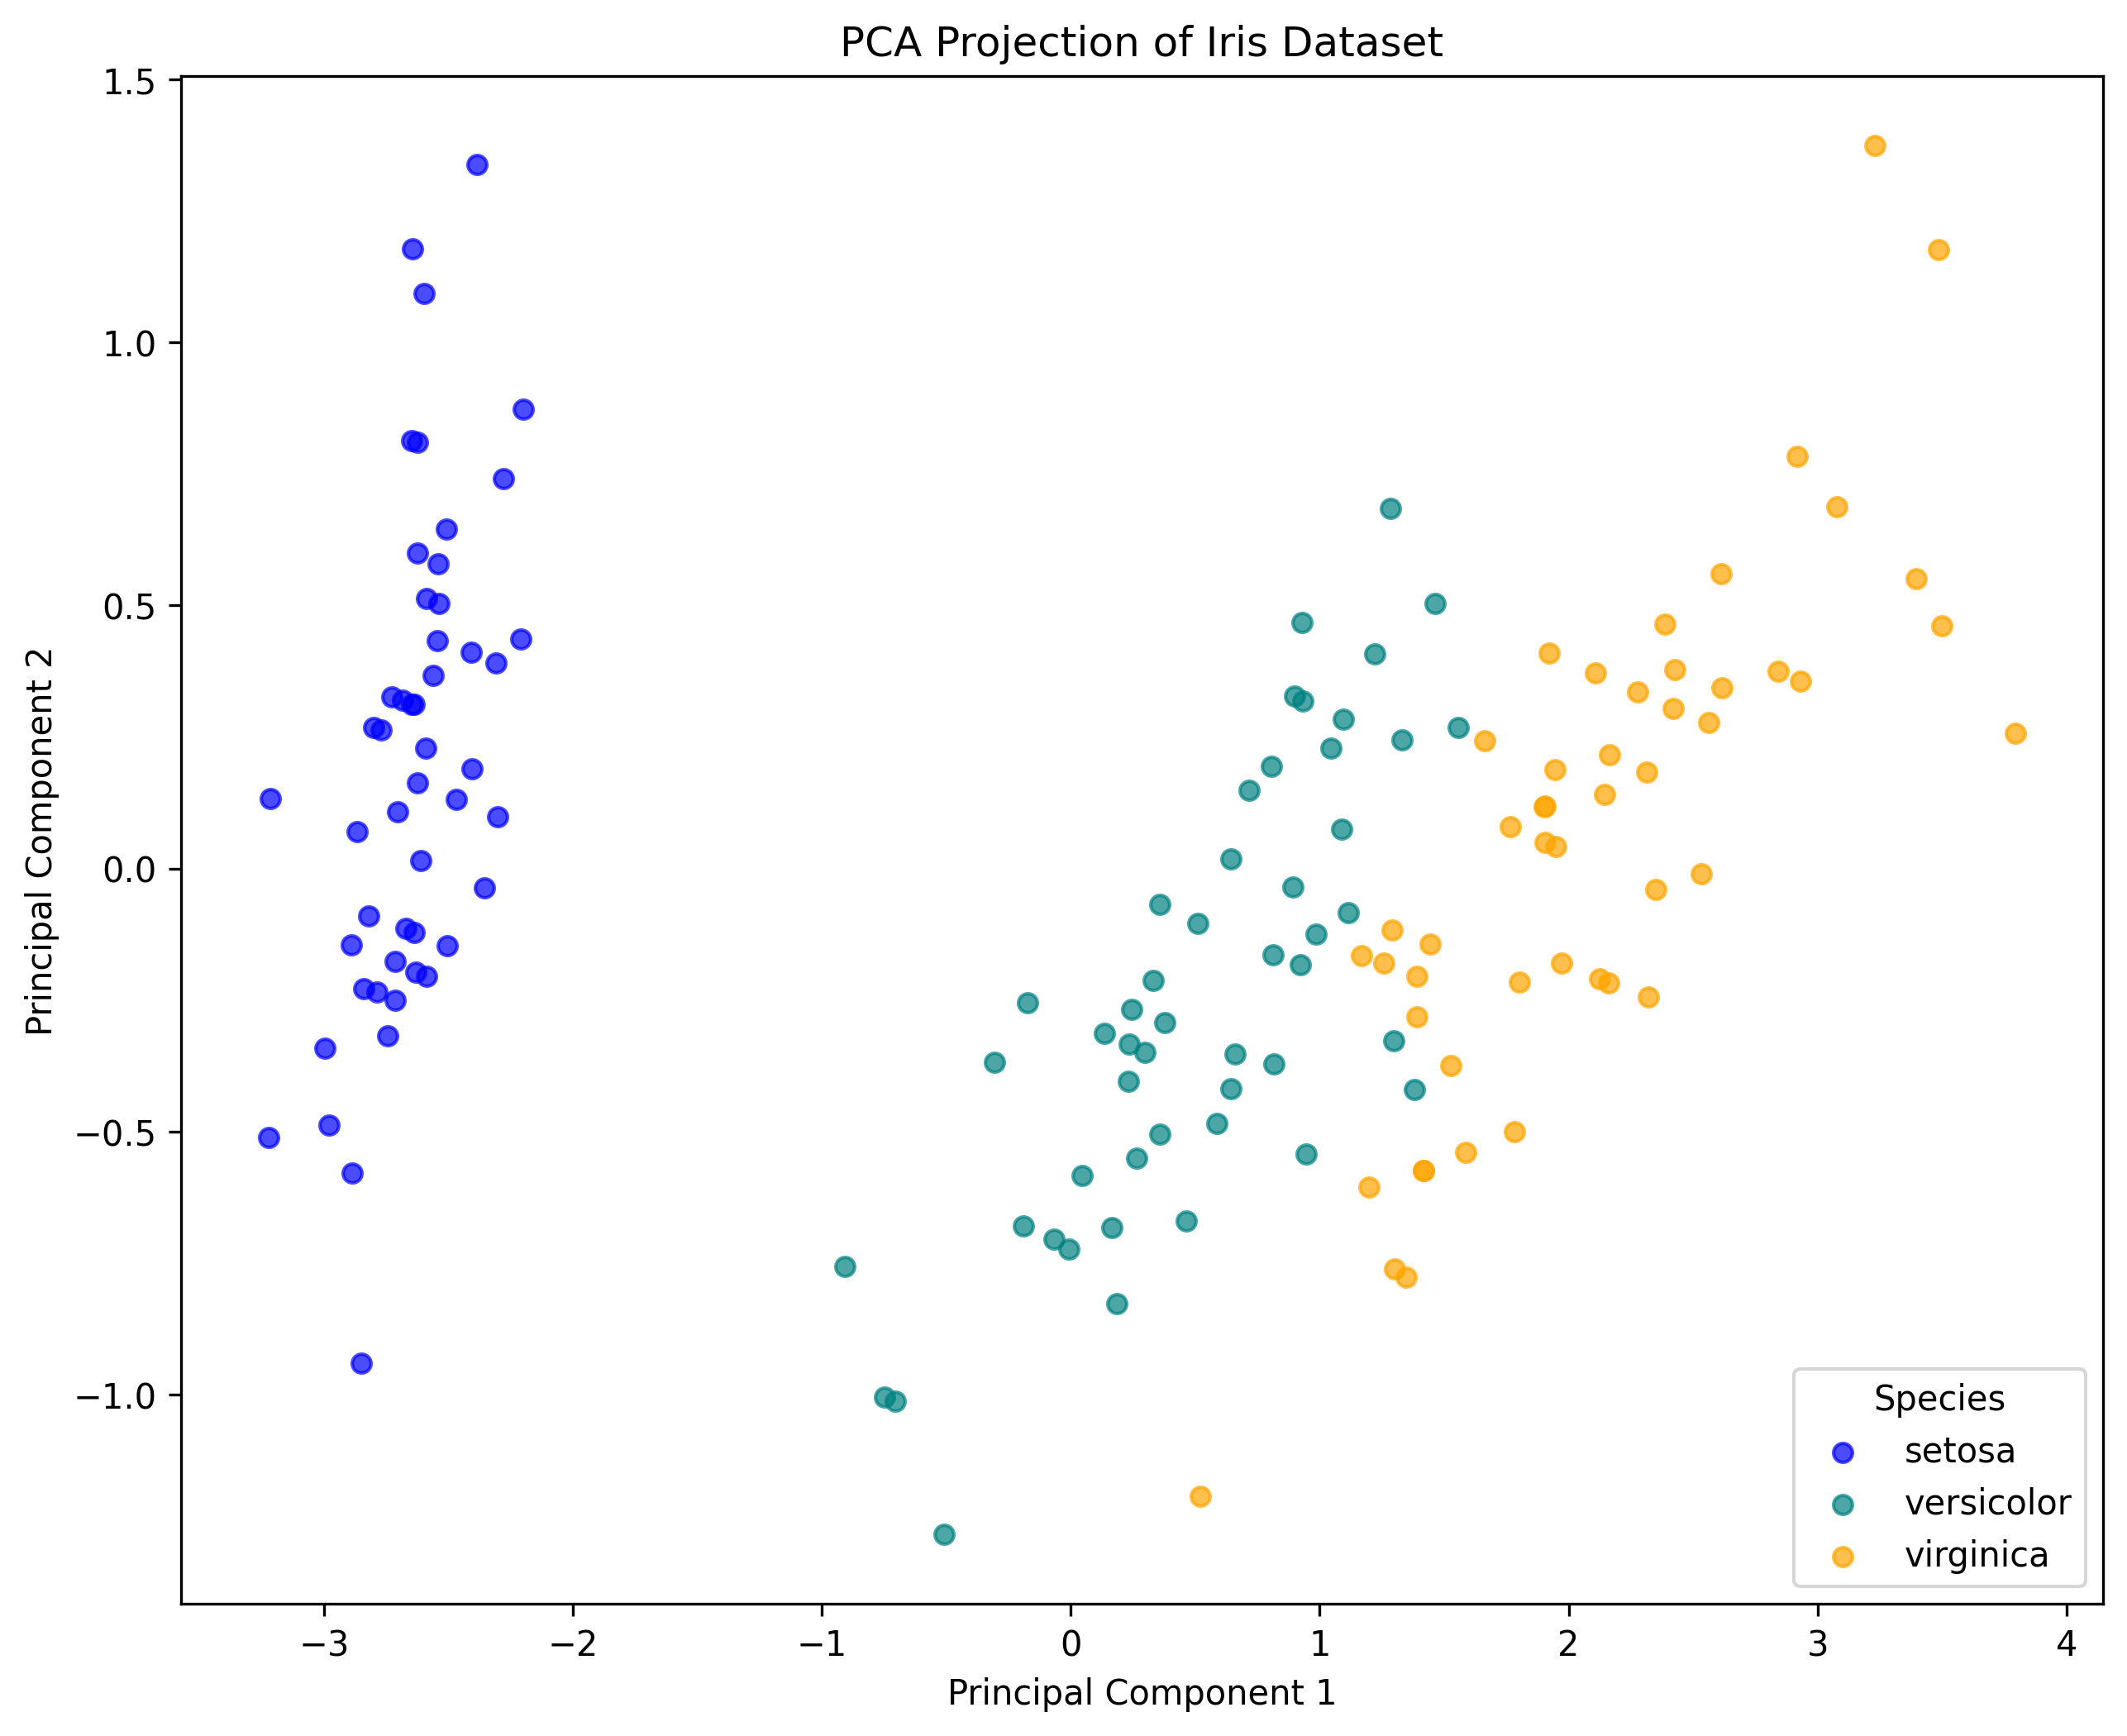

In [2]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8), dpi=300)

colors = ['blue', 'teal', 'orange']
species = ['setosa', 'versicolor', 'virginica']
for i, color in enumerate(colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=color, label=species[i], s=30, alpha=0.7)
plt.legend(title='Species', loc='lower right')
plt.title('PCA Projection of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.savefig('pca_projection_iris.png', dpi=300)
plt.show()

In [3]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

digits = load_digits()  # 8x8 images of handwritten digits (0-9), 64 features
X = digits.data
y = digits.target

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

print(X_tsne.shape)

(1797, 2)


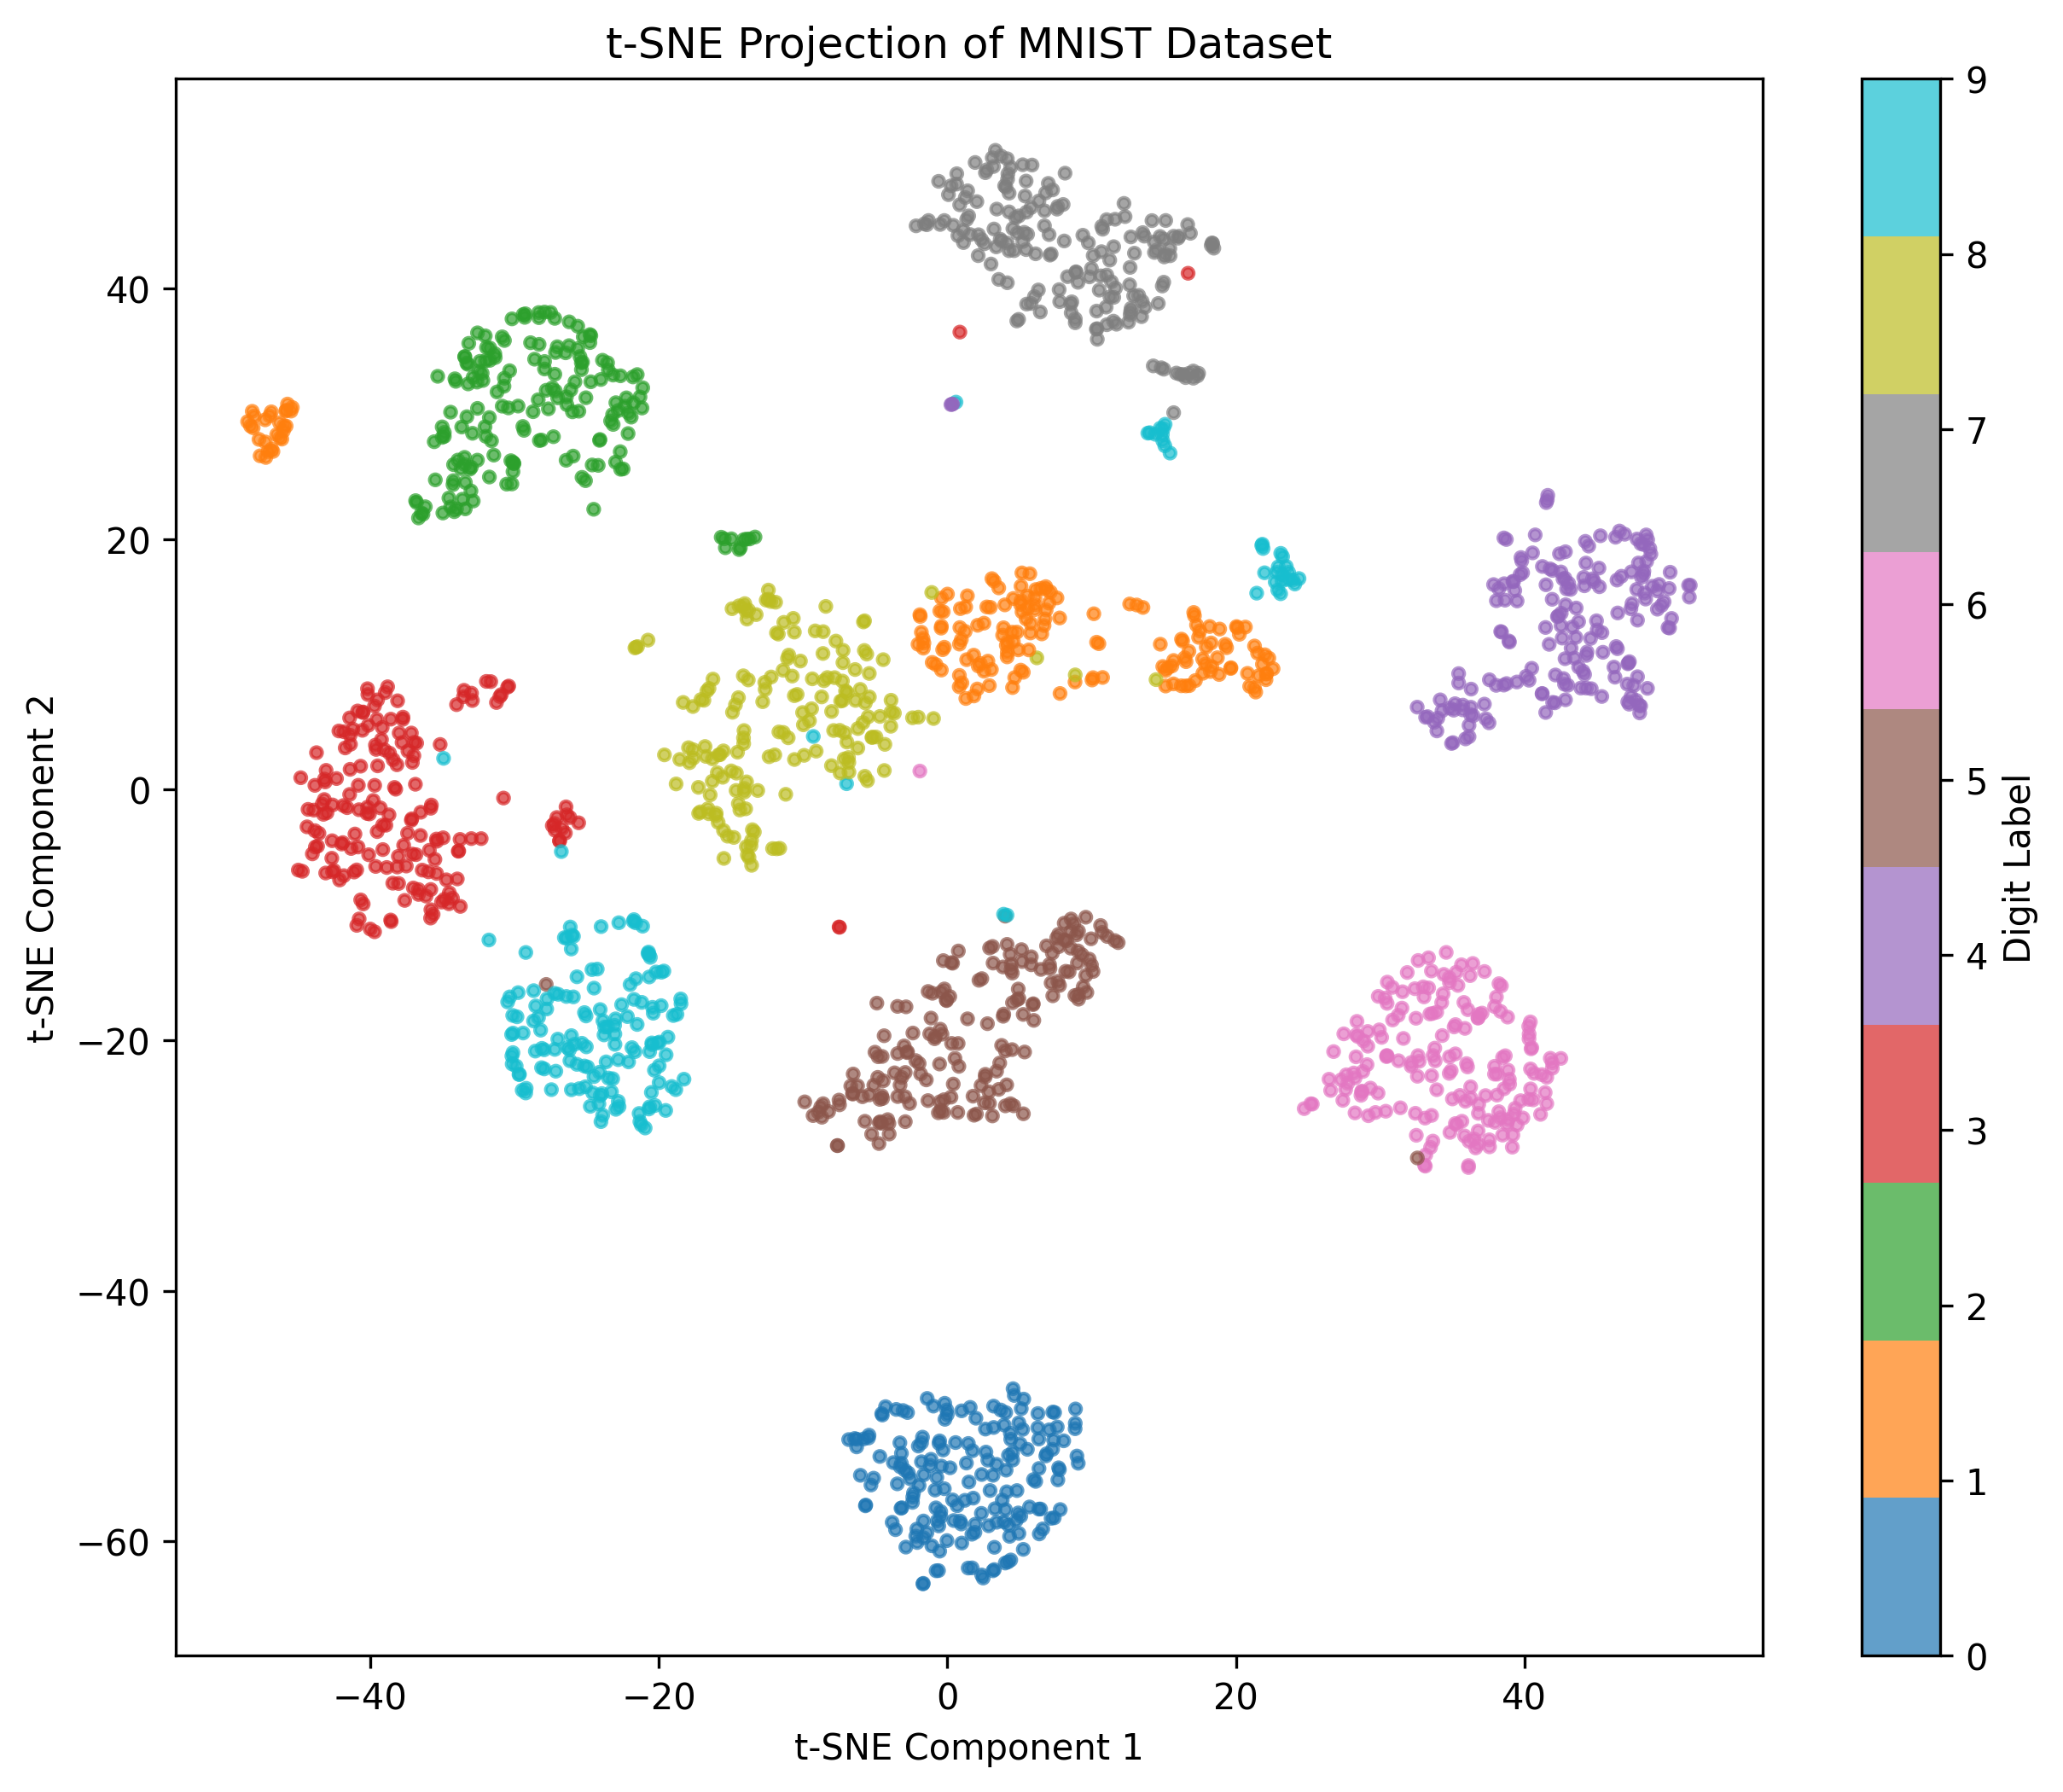

In [4]:
plt.figure(figsize=(10, 8), dpi=300)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label='Digit Label')
plt.title('t-SNE Projection of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.savefig('tsne_projection.png', dpi=300)
plt.show()

In [9]:
from tensorflow.keras import layers, models

digits = load_digits()  # 8x8 images of handwritten digits (0-9), 64 features
X = digits.data

# Define dimensions
input_dim = X.shape[1]    # e.g. 64 for digits dataset
encoding_dim = 2    # size of latent space

# Encoder network
input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# Decoder network
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model maps input->reconstruction
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder (use X as both input and target)
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True, verbose=0)

# After training, get encoded 2D representation
encoder = models.Model(input_img, encoded)
X_encoded = encoder.predict(X)
print(X_encoded[:5])

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
[[43.21227  35.132553]
 [41.041183 44.848194]
 [53.16863  44.39012 ]
 [40.53608  33.203808]
 [35.92625  49.25694 ]]


In [18]:
# Load and preprocess data
digits = load_digits()
X = digits.data / 16.0  # Normalize to [0, 1]

# Define dimensions
input_dim = X.shape[1]
encoding_dim = 2

# Encoder
input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(input_img)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train with validation
history = autoencoder.fit(
    X, X,
    epochs=200,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

# Reconstruct images
reconstructed_imgs = autoencoder.predict(X)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1745 - val_loss: 0.1372
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.1135 - val_loss: 0.0796
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.0757 - val_loss: 0.0723
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.0713 - val_loss: 0.0668
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.0666 - val_loss: 0.0632
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.0637 - val_loss: 0.0620
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.0623 - val_loss: 0.0606
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.0603 - val_loss: 0.0598
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.0600 - val_loss: 0.0583
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.0588 - val_loss: 0.0576
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0577 - val_loss: 0.0571
Epoch 12/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 

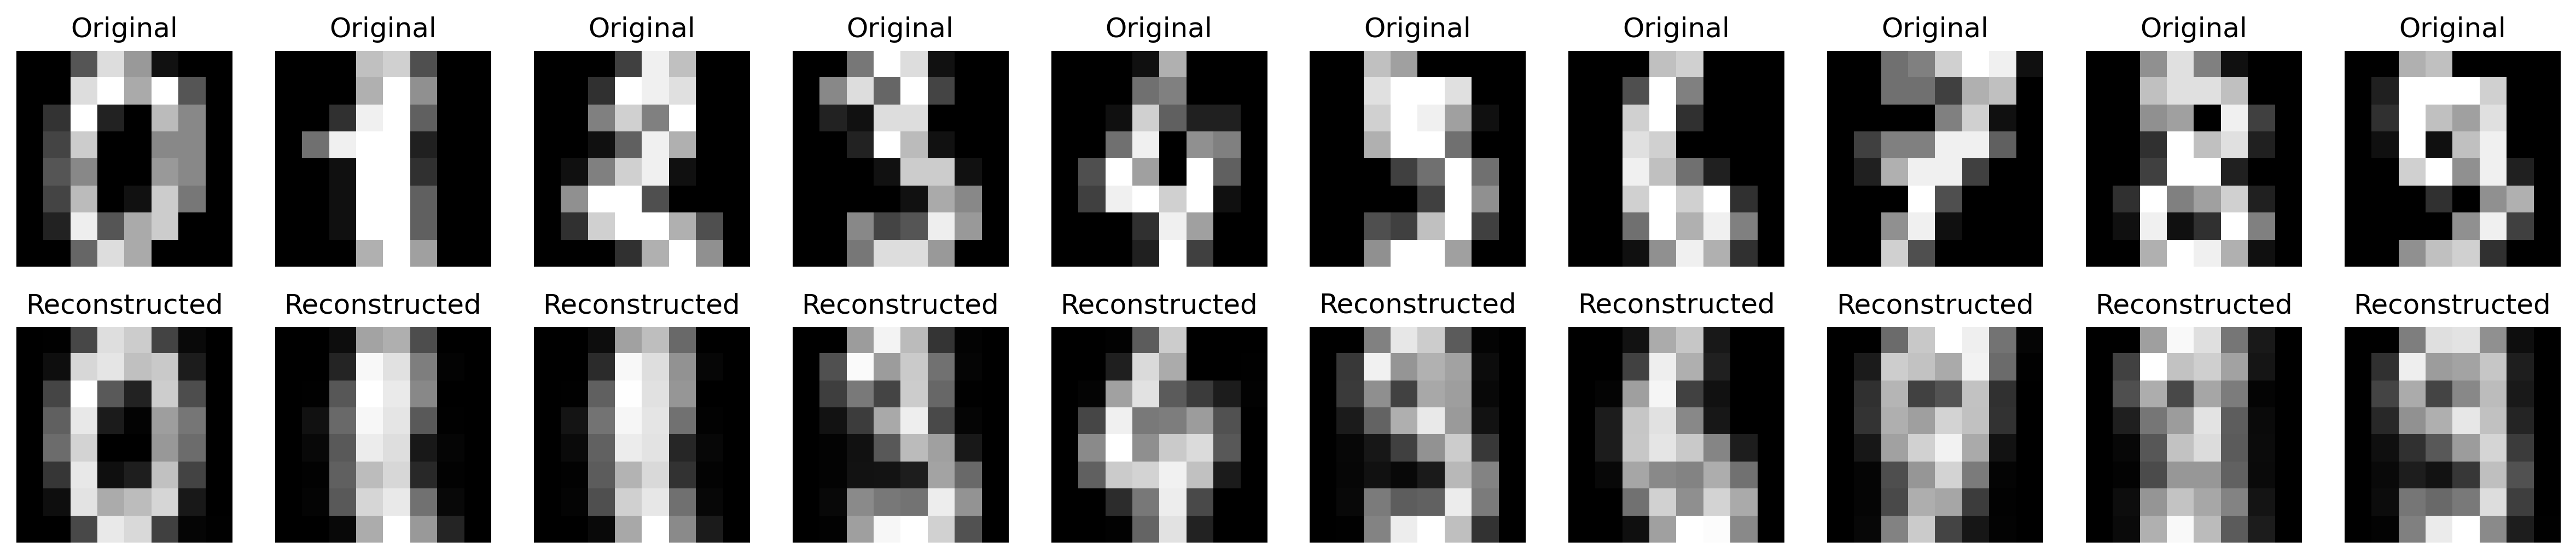

In [19]:
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4), dpi=300)
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(8, 8), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.savefig('autoencoder_reconstruction.png', dpi=300)
plt.show()

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

print(X_lda.shape)
print(lda.explained_variance_ratio_)   # proportion of class-separability variance

(150, 2)
[0.9912126 0.0087874]


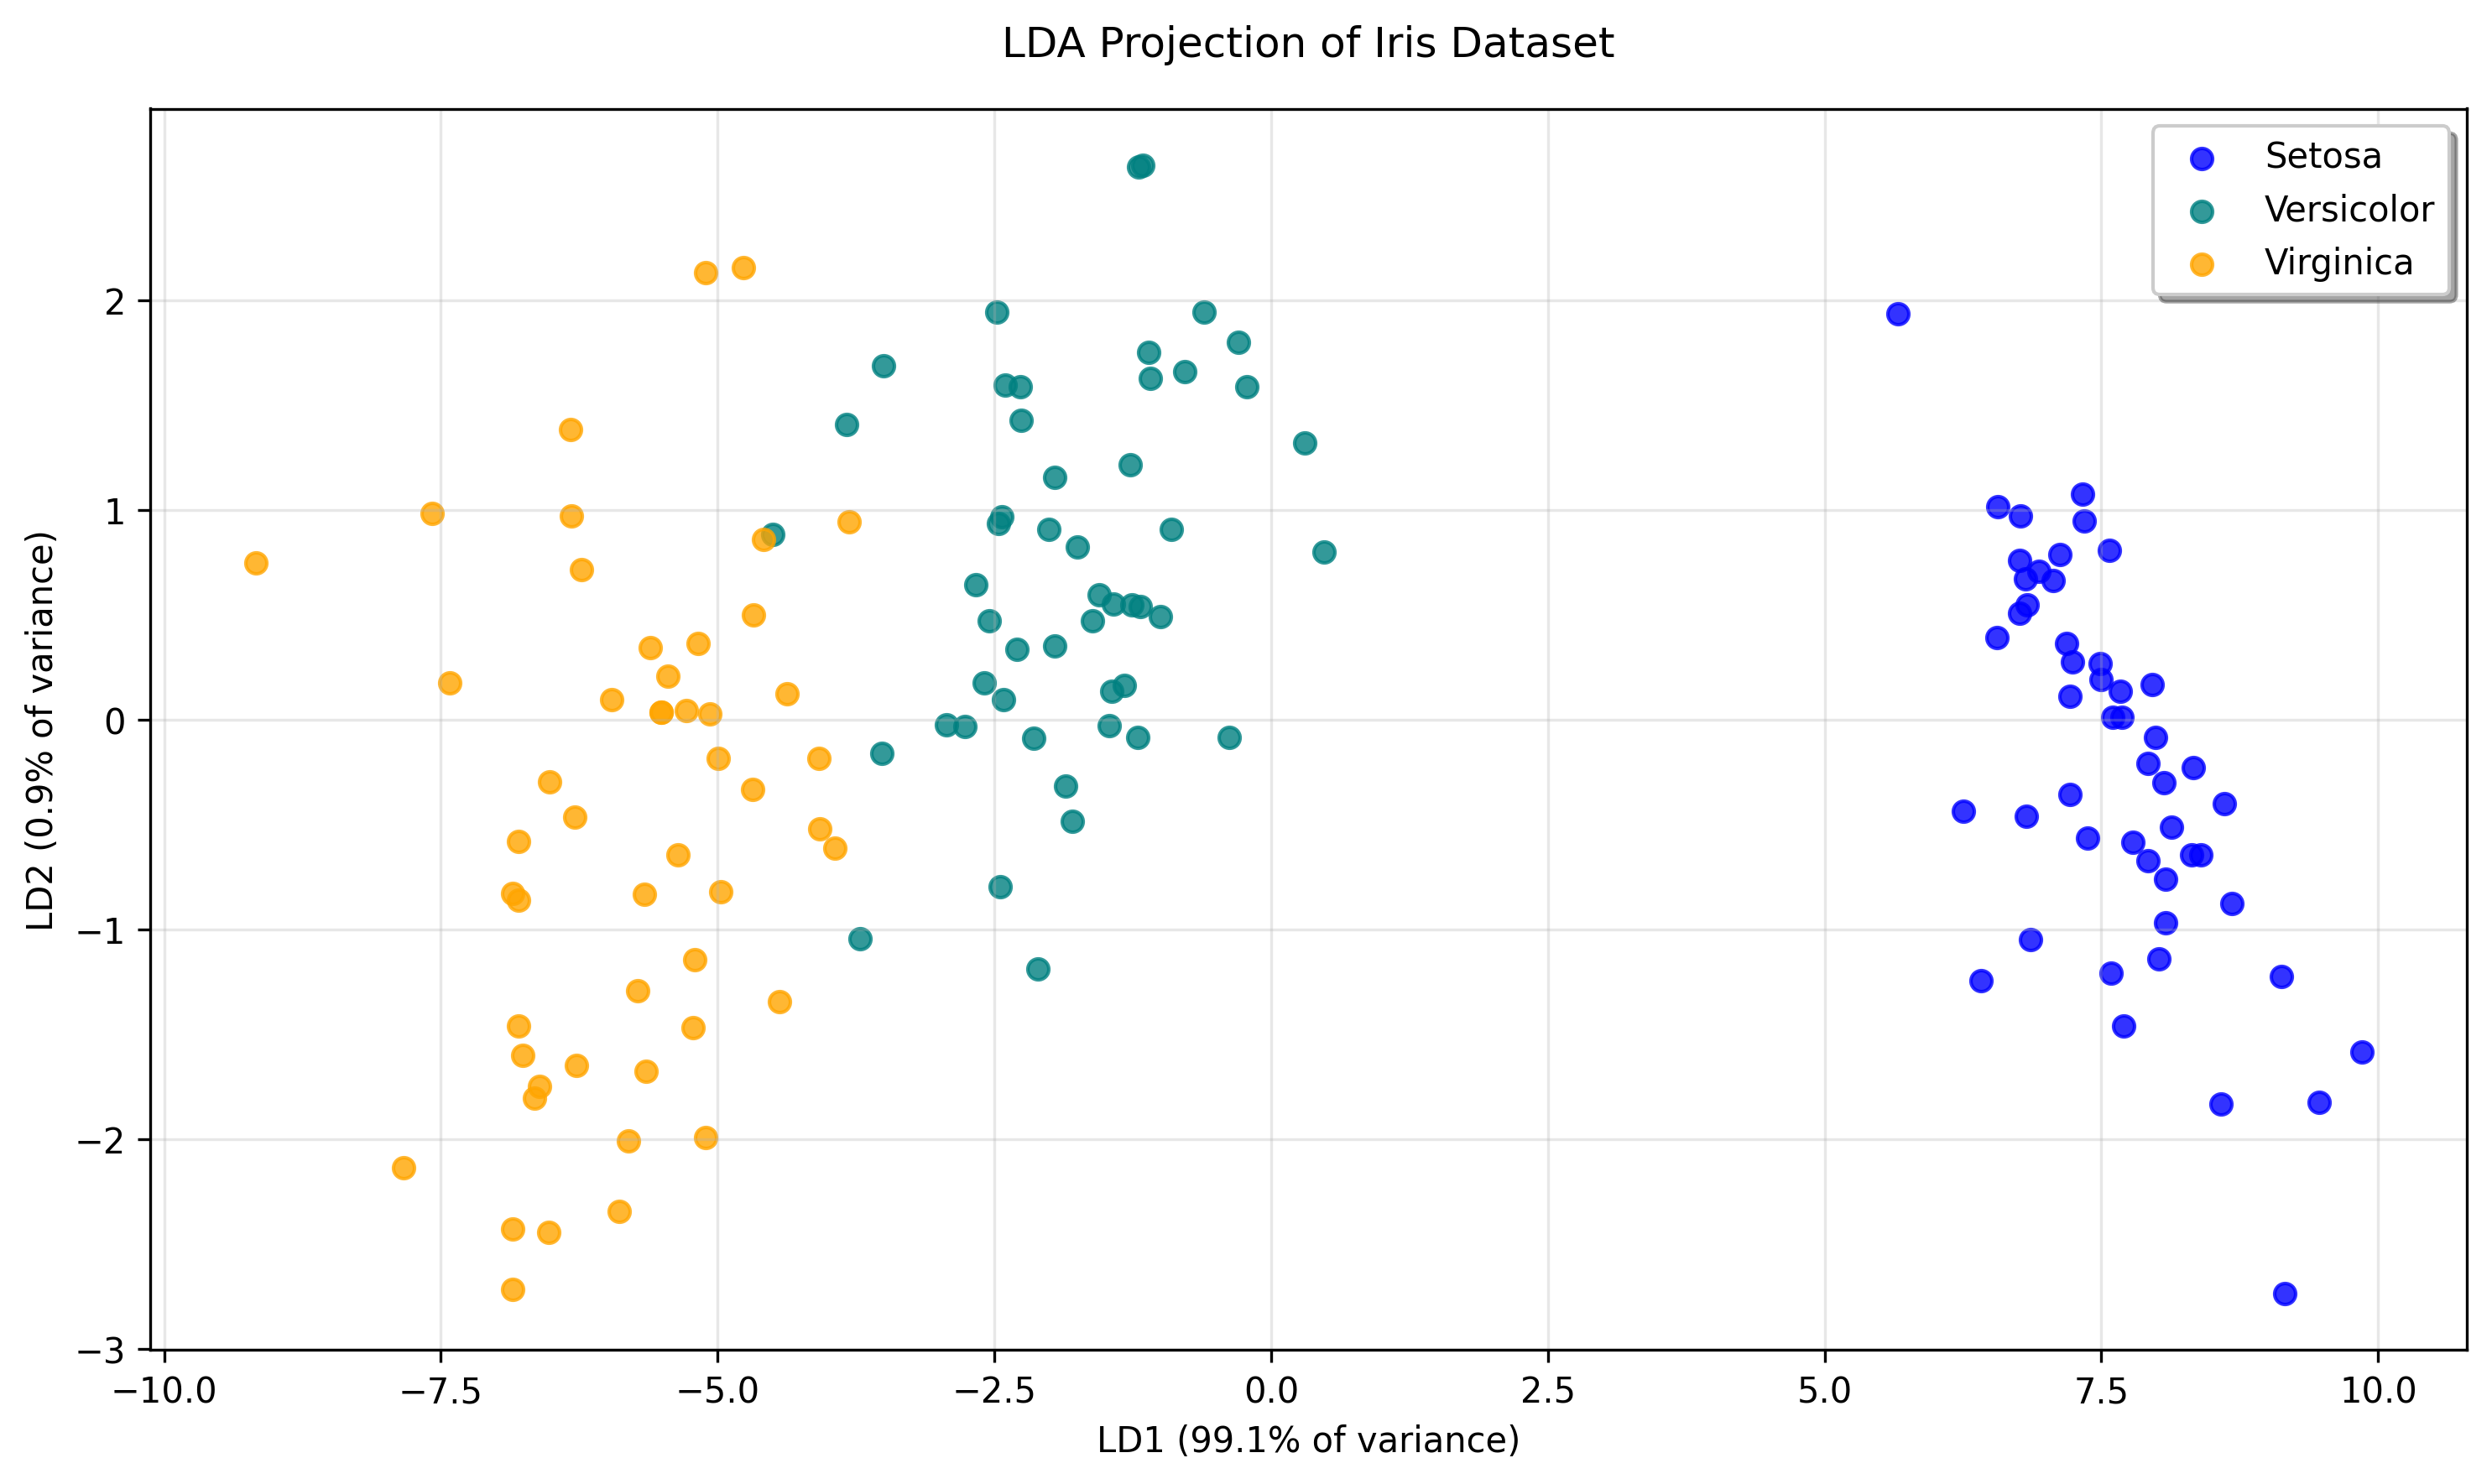

In [21]:
# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(10, 6), dpi=300)
colors = ['blue', 'teal', 'orange']
species = ['Setosa', 'Versicolor', 'Virginica']

# Plot each species
for color, i, species_name in zip(colors, [0, 1, 2], species):
    plt.scatter(X_lda[y == i, 0], 
                X_lda[y == i, 1],
                alpha=0.8,
                color=color,
                label=species_name)

plt.title('LDA Projection of Iris Dataset', pad=15)
plt.xlabel(f'LD1 ({lda.explained_variance_ratio_[0]*100:.1f}% of variance)')
plt.ylabel(f'LD2 ({lda.explained_variance_ratio_[1]*100:.1f}% of variance)')
plt.legend(loc='upper right', shadow=True)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('lda_iris_plot.png', dpi=300)
plt.show()

In [22]:
from sklearn.decomposition import NMF

# Load iris dataset
iris = load_iris()
X = iris.data

nmf = NMF(n_components=2, random_state=42)
W = nmf.fit_transform(X)    # shape (150, 2)
H = nmf.components_    # shape (2, 4)

print(W[:5])    # first 5 samples in 2D latent space
print(H[:, :4])    # the 2 basis vectors (for 4 features)

[[0.41356229 0.10457618]
 [0.36548759 0.14091832]
 [0.37785481 0.10179942]
 [0.35001275 0.14891411]
 [0.41596217 0.09520372]]
[[11.05547983  7.96828449  2.22911407  0.07051629]
 [ 5.0075179   2.01368146  4.58653481  1.64561552]]


/Users/kiara/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [26]:
import numpy as np
from sklearn.decomposition import FastICA

# Simulate two independent source signals
t = np.linspace(0, 8, 1000)
s1 = np.sin(2 * np.pi * 1 * t)    # Source 1: sine wave
s2 = np.sign(np.sin(2 * np.pi * 4 * t))   # Source 2: square wave
S = np.vstack([s1, s2]).T   # shape (1000, 2), each column is a source

# Mix the sources with a random mixing matrix A
A = np.array([[0.6, 0.4], 
[0.4, 0.81]])    # 2x2 mixing matrix
X_mixed = S.dot(A.T)    # Observations (1000 x 2)

# Apply FastICA to recover independent components
ica = FastICA(n_components=2, random_state=0)
S_ica = ica.fit_transform(X_mixed)    # ICA estimated sources
A_ica = ica.mixing_    # Estimated mixing matrix

print(np.round(ica.mixing_, 2))

[[0.4  0.42]
 [0.81 0.28]]


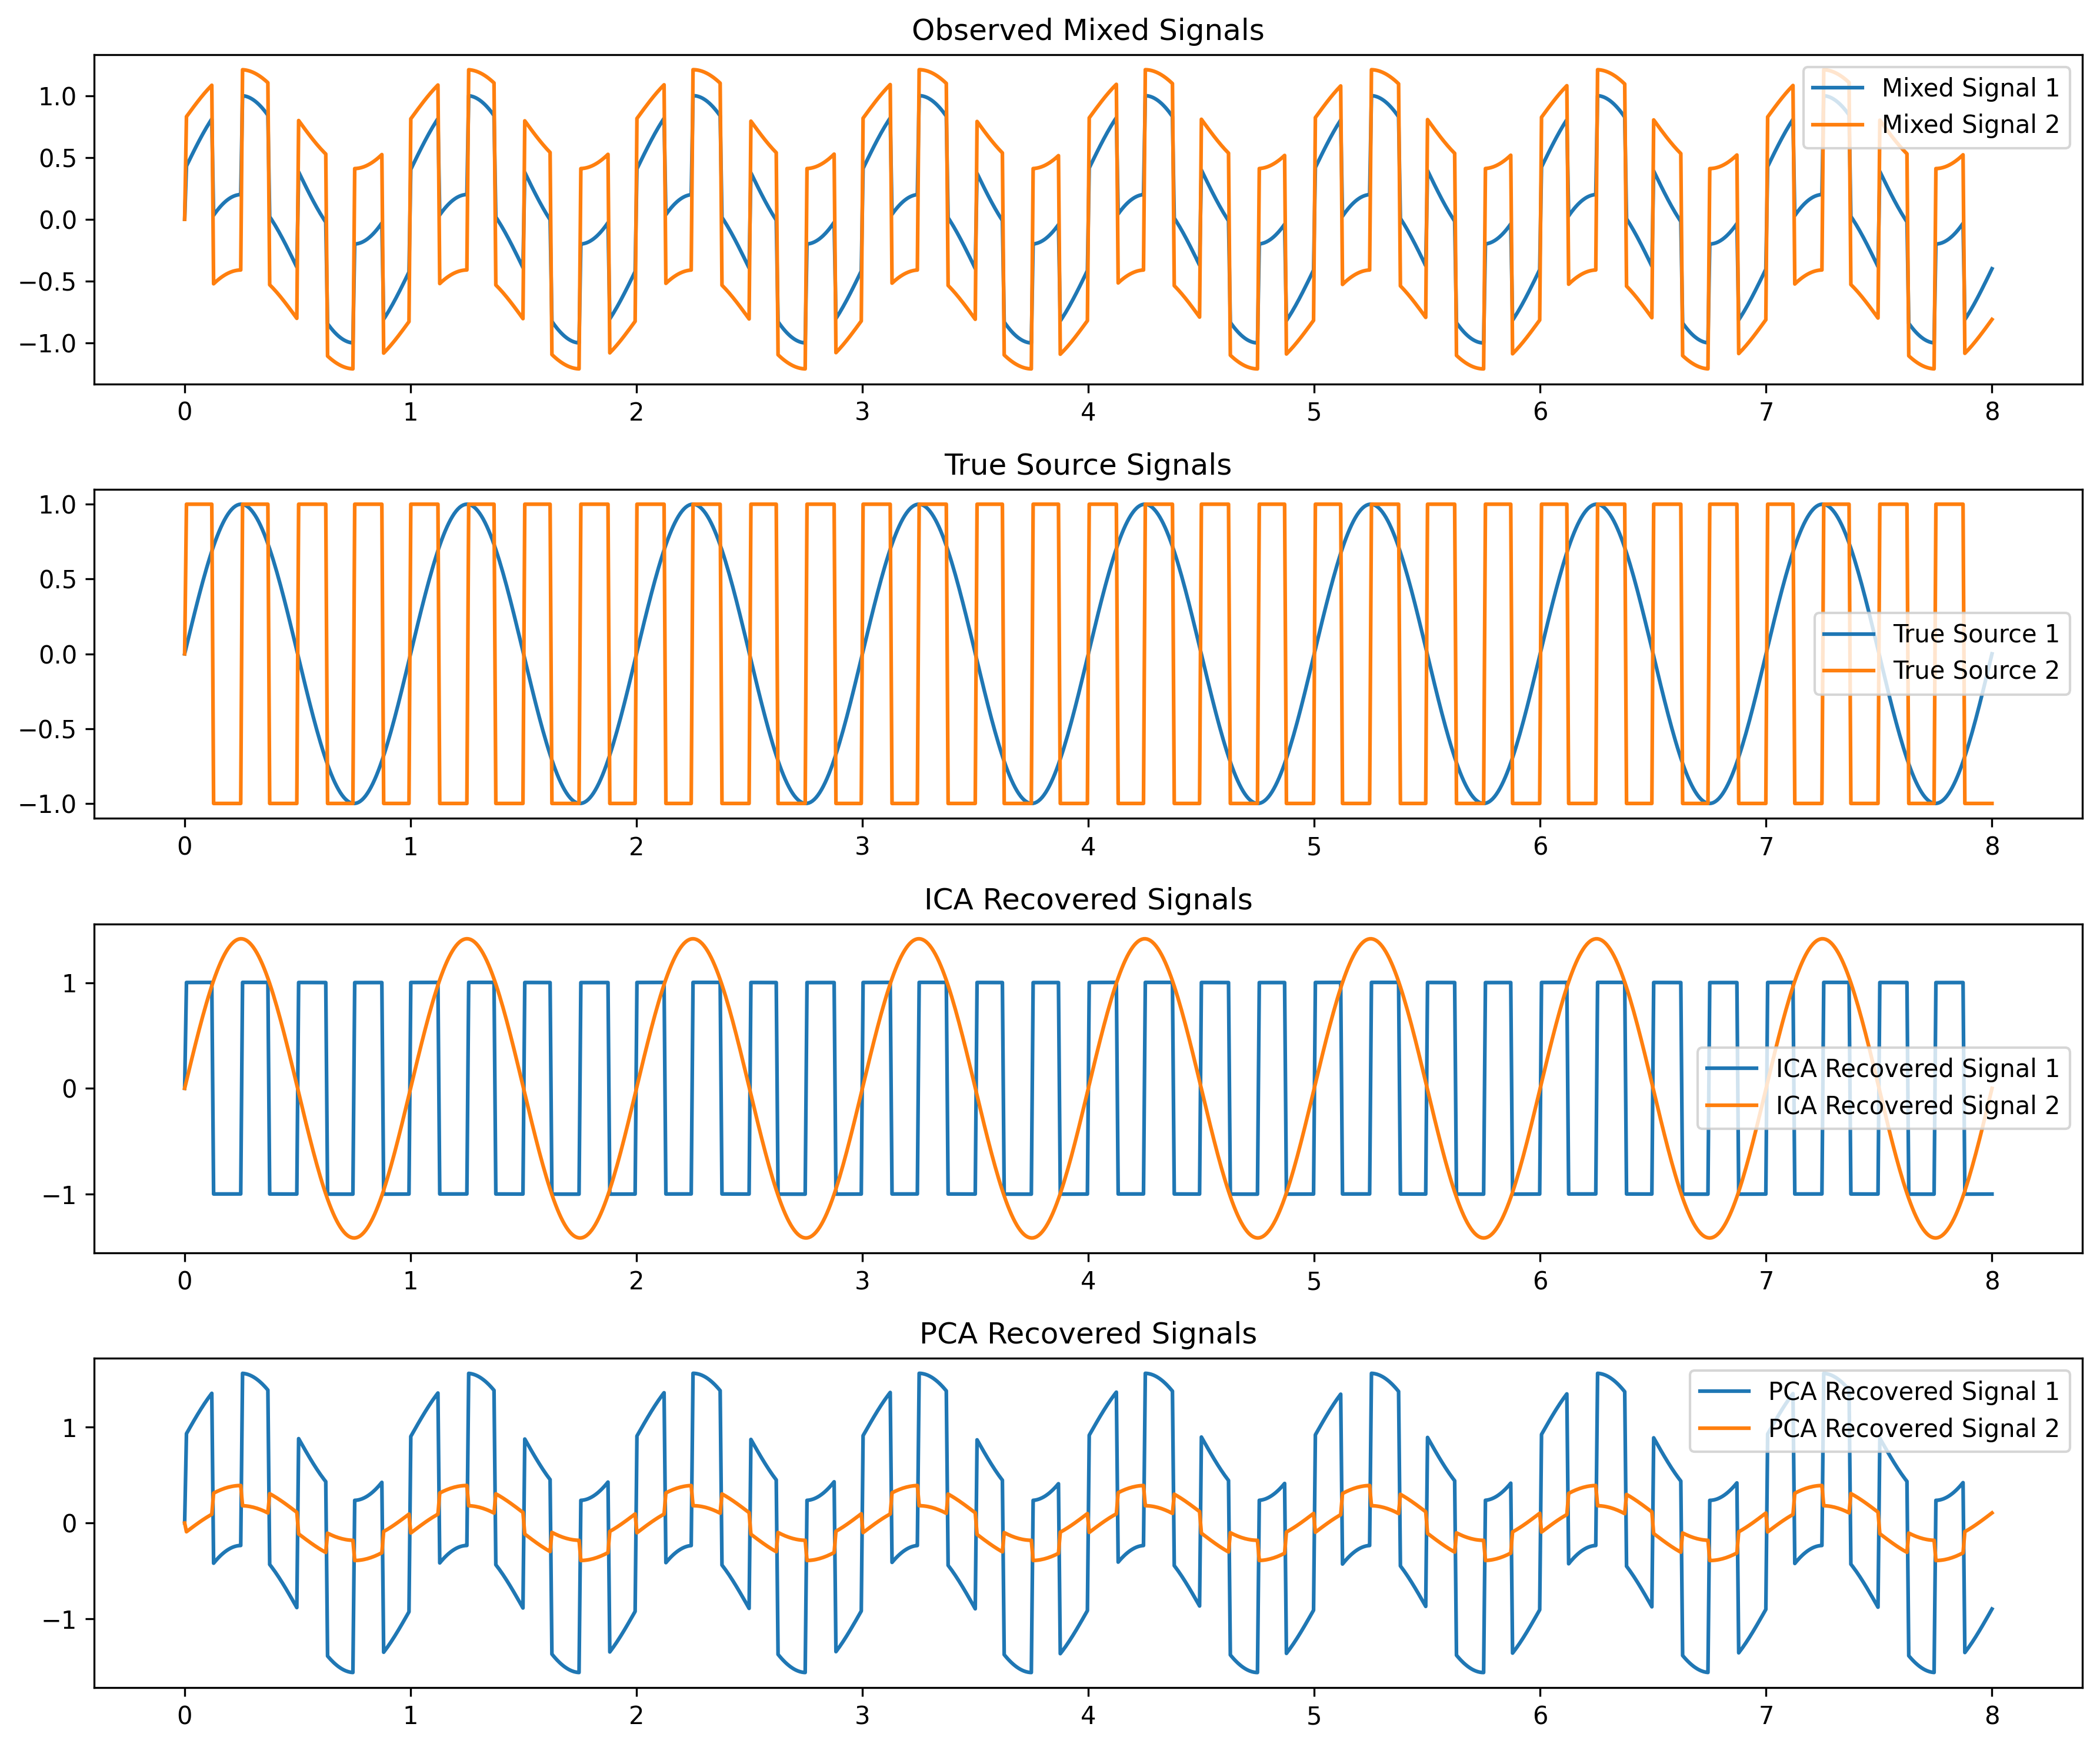

In [27]:
# Apply PCA for comparison
pca = PCA(n_components=2)
S_pca = pca.fit_transform(X_mixed)

plt.figure(figsize=(12, 10), dpi=300)

# Observed mixed signals
plt.subplot(4, 1, 1)
plt.plot(t, X_mixed[:, 0], label='Mixed Signal 1')
plt.plot(t, X_mixed[:, 1], label='Mixed Signal 2')
plt.title('Observed Mixed Signals')
plt.legend()

# True source signals
plt.subplot(4, 1, 2)
plt.plot(t, S[:, 0], label='True Source 1')
plt.plot(t, S[:, 1], label='True Source 2')
plt.title('True Source Signals')
plt.legend()

# ICA recovered signals
plt.subplot(4, 1, 3)
plt.plot(t, S_ica[:, 0], label='ICA Recovered Signal 1')
plt.plot(t, S_ica[:, 1], label='ICA Recovered Signal 2')
plt.title('ICA Recovered Signals')
plt.legend()

# PCA recovered signals
plt.subplot(4, 1, 4)
plt.plot(t, S_pca[:, 0], label='PCA Recovered Signal 1')
plt.plot(t, S_pca[:, 1], label='PCA Recovered Signal 2')
plt.title('PCA Recovered Signals')
plt.legend()

plt.tight_layout()
plt.savefig('ica_signal_separation.png', dpi=300)
plt.show()

In [28]:
import umap

digits = load_digits()
X = digits.data
y = digits.target

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)
print(X_umap.shape)

/Users/kiara/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/kiara/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kiara/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(1797, 2)


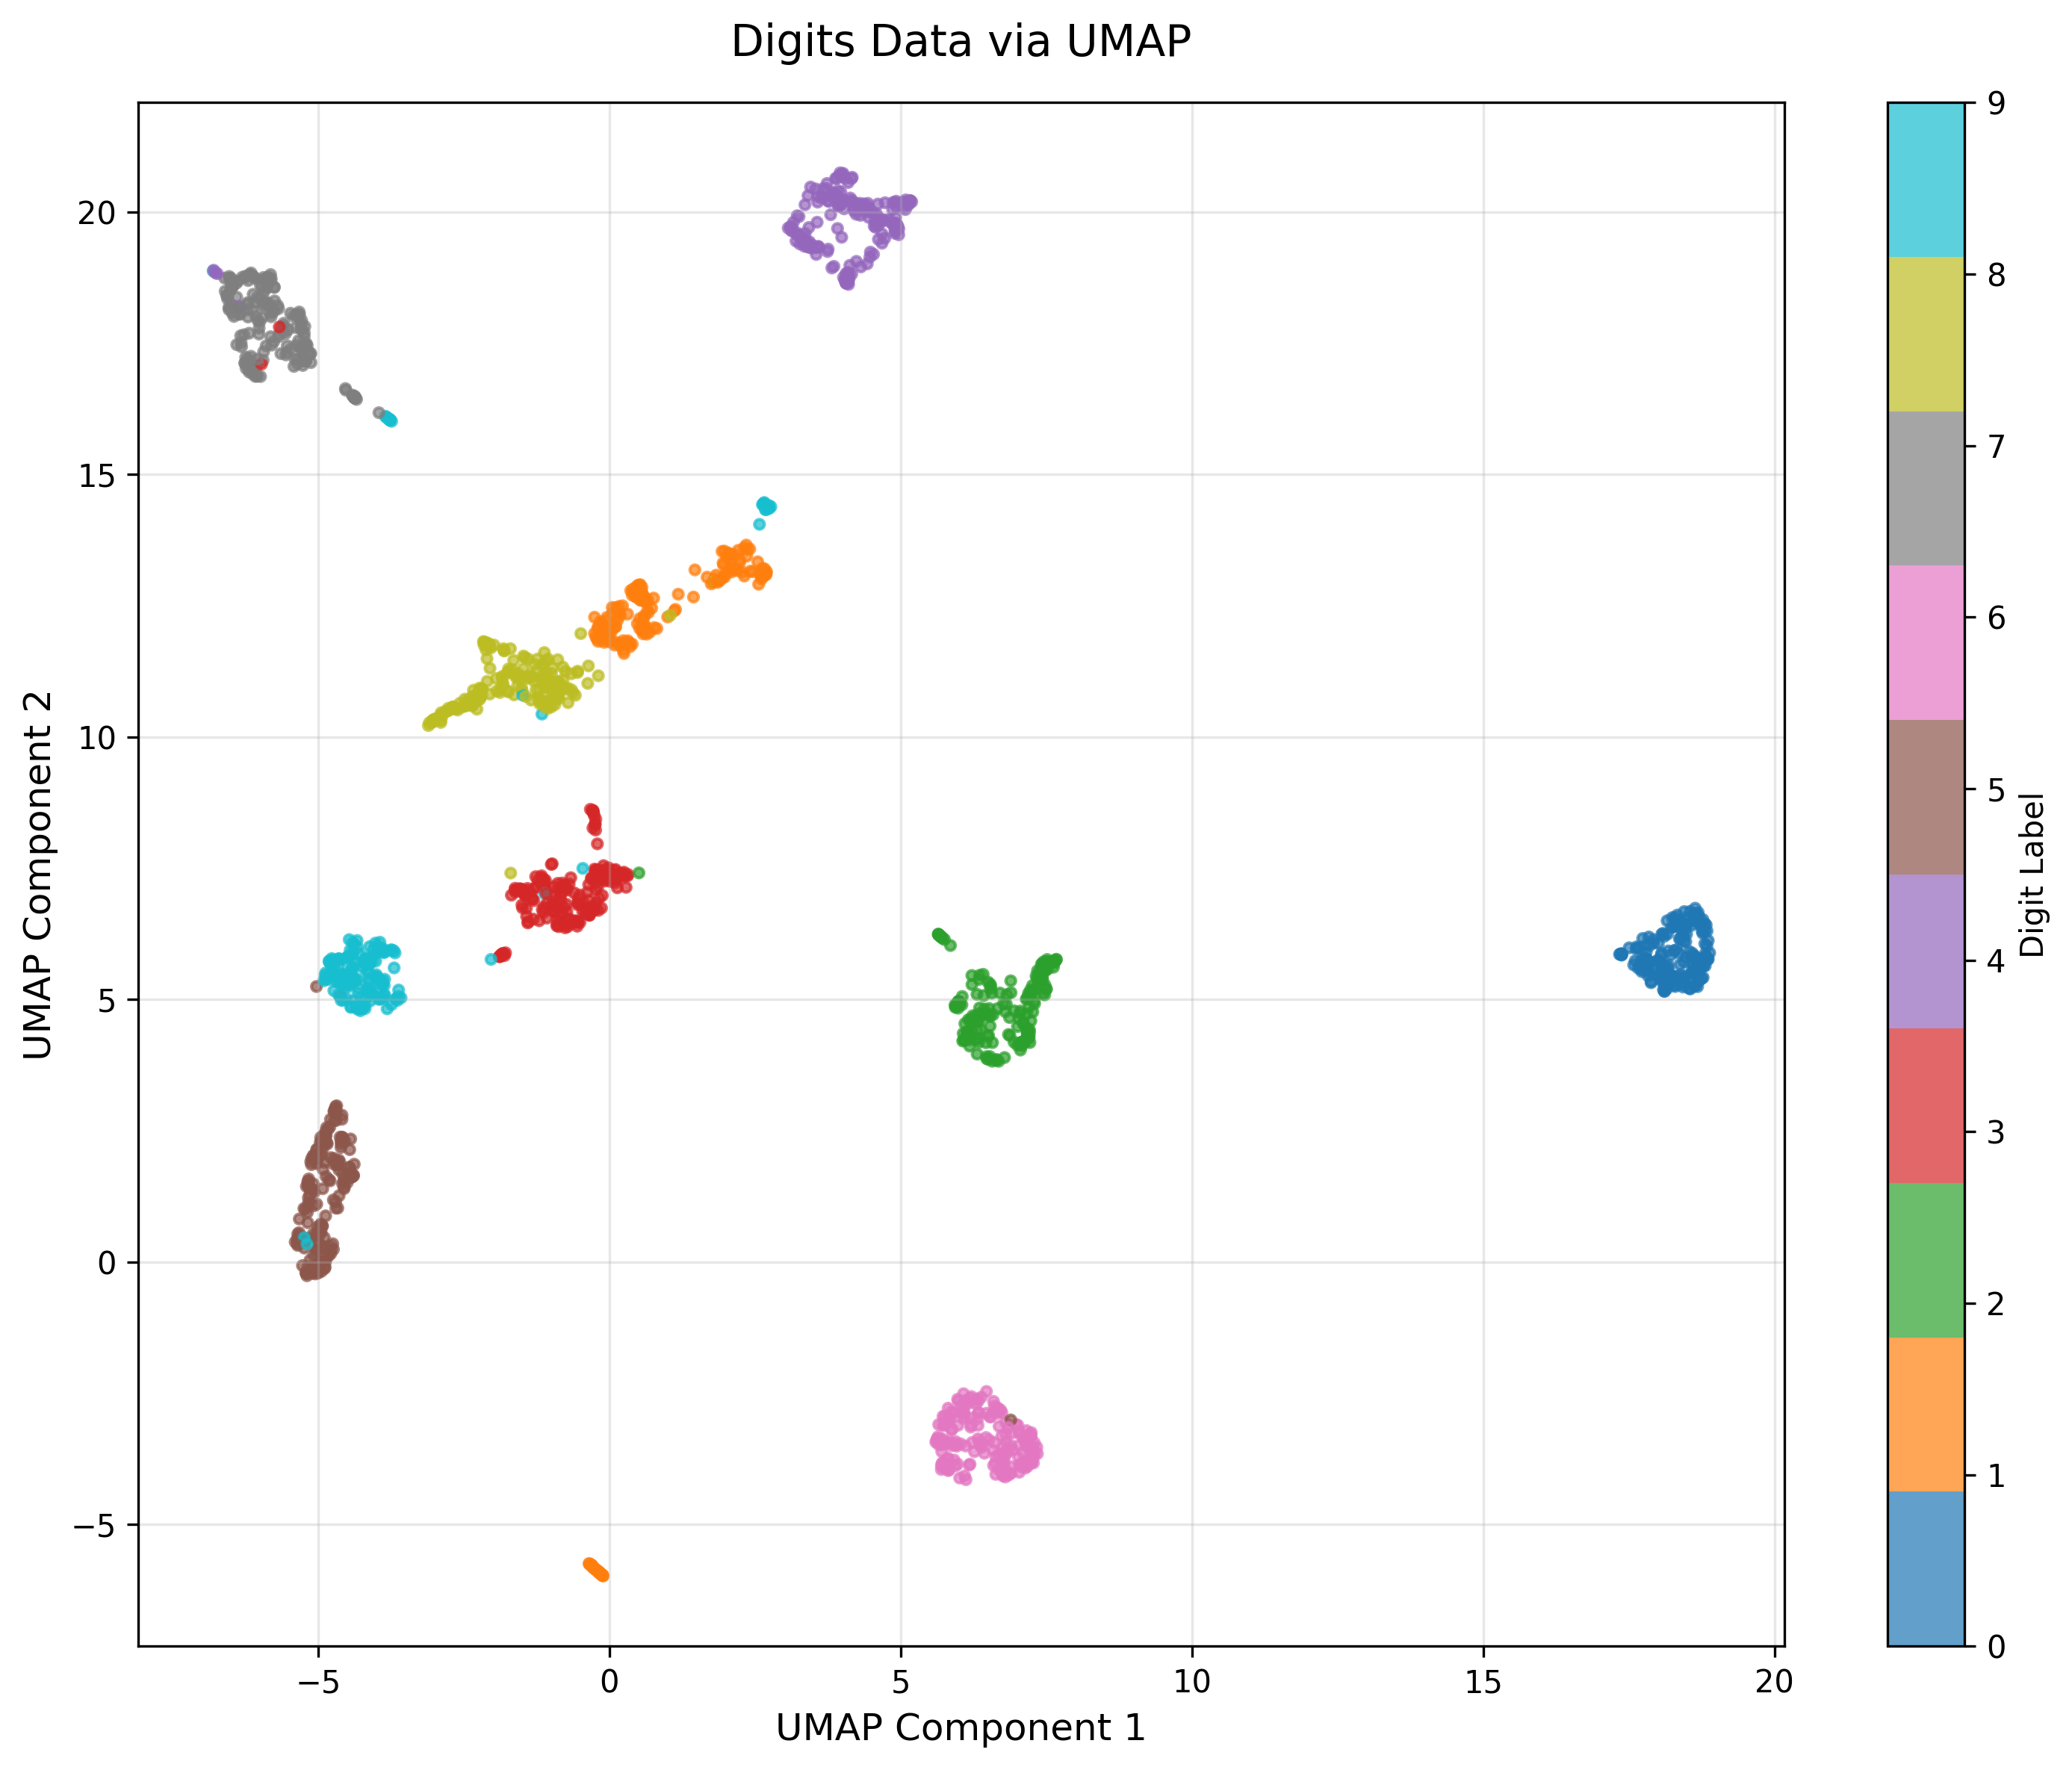

In [29]:
plt.figure(figsize=(10, 8), dpi=300)
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap="tab10", s=10, alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("Digits Data via UMAP", fontsize=14, pad=15)
plt.xlabel("UMAP Component 1", fontsize=12)
plt.ylabel("UMAP Component 2", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("umap_digits_plot.png", dpi=300)
plt.show()